In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Practical Exam Datasets/K-Means & Hirarchical Clustering/cities_r2.csv')

In [3]:
df.shape

(493, 22)

In [4]:
df.isnull().sum()

name_of_city                      0
state_code                        0
state_name                        0
dist_code                         0
population_total                  0
population_male                   0
population_female                 0
0-6_population_total              0
0-6_population_male               0
0-6_population_female             0
literates_total                   0
literates_male                    0
literates_female                  0
sex_ratio                         0
child_sex_ratio                   0
effective_literacy_rate_total     0
effective_literacy_rate_male      0
effective_literacy_rate_female    0
location                          0
total_graduates                   0
male_graduates                    0
female_graduates                  0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name_of_city                    493 non-null    object 
 1   state_code                      493 non-null    int64  
 2   state_name                      493 non-null    object 
 3   dist_code                       493 non-null    int64  
 4   population_total                493 non-null    int64  
 5   population_male                 493 non-null    int64  
 6   population_female               493 non-null    int64  
 7   0-6_population_total            493 non-null    int64  
 8   0-6_population_male             493 non-null    int64  
 9   0-6_population_female           493 non-null    int64  
 10  literates_total                 493 non-null    int64  
 11  literates_male                  493 non-null    int64  
 12  literates_female                493 

In [6]:
df.describe()

,state_code,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,total_graduates,male_graduates,female_graduates
count,493.000000,493.000000,4.930000e+02,4.930000e+02,4.930000e+02,4.930000e+02,493.000000,493.000000,4.930000e+02,4.930000e+02,4.930000e+02,493.000000,493.000000,493.000000,493.000000,493.000000,4.930000e+02,4.930000e+02,4.930000e+02
mean,18.643002,16.782961,4.481124e+05,2.343468e+05,2.137656e+05,4.709285e+04,24849.527383,22243.320487,3.461527e+05,1.894384e+05,1.567143e+05,930.294118,902.332657,85.131460,89.920162,79.967181,6.620236e+04,3.771556e+04,2.848680e+04
std,9.297168,15.566131,1.033228e+06,5.487786e+05,4.848622e+05,1.050279e+05,55535.310272,49523.241379,8.220952e+05,4.534753e+05,3.690677e+05,55.849106,49.794689,6.186345,5.377492,7.577825,1.778187e+05,9.849574e+04,7.951556e+04
min,1.000000,1.000000,1.000360e+05,5.020100e+04,4.512600e+04,6.547000e+03,3406.000000,3107.000000,5.699800e+04,3.475100e+04,2.224700e+04,700.000000,762.000000,49.510000,52.270000,46.450000,2.532000e+03,1.703000e+03,8.290000e+02
25%,9.000000,7.000000,1.261420e+05,6.638400e+04,6.041100e+04,1.363900e+04,7221.000000,6457.000000,9.768700e+04,5.357800e+04,4.391400e+04,890.000000,868.000000,81.750000,87.280000,75.800000,1.527700e+04,9.289000e+03,6.114000e+03
50%,19.000000,13.000000,1.841330e+05,9.665500e+04,8.776800e+04,1.944000e+04,10342.000000,9172.000000,1.413290e+05,7.590600e+04,6.383600e+04,922.000000,903.000000,85.970000,91.180000,80.920000,2.395900e+04,1.404900e+04,9.558000e+03
75%,27.000000,21.000000,3.490330e+05,1.750550e+05,1.700260e+05,3.794500e+04,19982.000000,17954.000000,2.679000e+05,1.455480e+05,1.235030e+05,971.000000,942.000000,89.330000,93.400000,85.400000,5.036700e+04,2.787200e+04,2.086600e+04
max,35.000000,99.000000,1.247845e+07,6.736815e+06,5.741632e+06,1.209275e+06,647938.000000,561337.000000,1.023759e+07,5.727774e+06,4.509812e+06,1093.000000,1185.000000,98.800000,99.300000,98.310000,2.221137e+06,1.210040e+06,1.011097e+06


In [7]:
df.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [8]:
selected_cols=df[['effective_literacy_rate_total']]

In [9]:
#The StandardScaler in scikit-learn is a preprocessing technique used to standardize the features of a dataset. 
#Standardization is the process of rescaling the features so that they have the properties of a standard normal distribution. 
#This means that the standardized features will have a mean of 0 and a standard deviation of 1.

#The StandardScaler is particularly useful when you have features in your dataset that are measured in different units or have different scales. 
#If there is a dominant feature with a larger scale compared to other features, it could disproportionately influence the learning algorithm, 
#and the algorithm might give more importance to that feature during the training process.

sc=StandardScaler()
scaled_cols=sc.fit_transform(selected_cols)

In [10]:
#The elbow method is a technique used to determine the optimal number of clusters (K) for a K-Means clustering algorithm.
#It involves running the K-Means algorithm on the dataset for a range of values of K and then plotting the within-cluster 
#sum of squares (inertia) against the number of clusters. The "elbow" of the plot represents a point where the rate of decrease in inertia slows down, 
#and it is often considered the optimal number of clusters for the dataset.

#This code is known as "elbow method" to find the optimal number of clusters for a K-Means clustering algorithm. 

#This initializes an empty list called clusters
clusters=[]

# 1 to 24 
for i in range(1,25):
    #For each iteration of the loop, it creates a K-Means clustering model (kmeans) with the specified number of clusters (n_clusters=i).
    #n_init is the number of times the K-Means algorithm will be run with different centroid seeds. The best result in terms of inertia will be used.
    kmeans=KMeans(n_clusters=i,n_init=10,random_state=10)

    kmeans.fit(scaled_cols)

    #The inertia is a measure of how far the points within a cluster are from the center of that cluster. Lower inertia indicates a better-defined cluster.
    clusters.append(kmeans.inertia_)

In [11]:
clusters

[492.99999999999983,
 194.09785646249304,
 106.1343746909834,
 67.26695490379967,
 46.00677795226856,
 32.769953439988775,
 24.24919759902963,
 18.38652114062471,
 15.022737302409645,
 11.835926082488866,
 9.309243475861994,
 7.8559472343721595,
 6.41687038859652,
 5.273653036315858,
 4.515967396382651,
 3.906252097768465,
 3.4880553325081896,
 2.97666841621223,
 2.7883634168062956,
 2.472640098579666,
 2.127695221751899,
 1.9670573754182943,
 1.7077585738435024,
 1.494598755989581]

[]

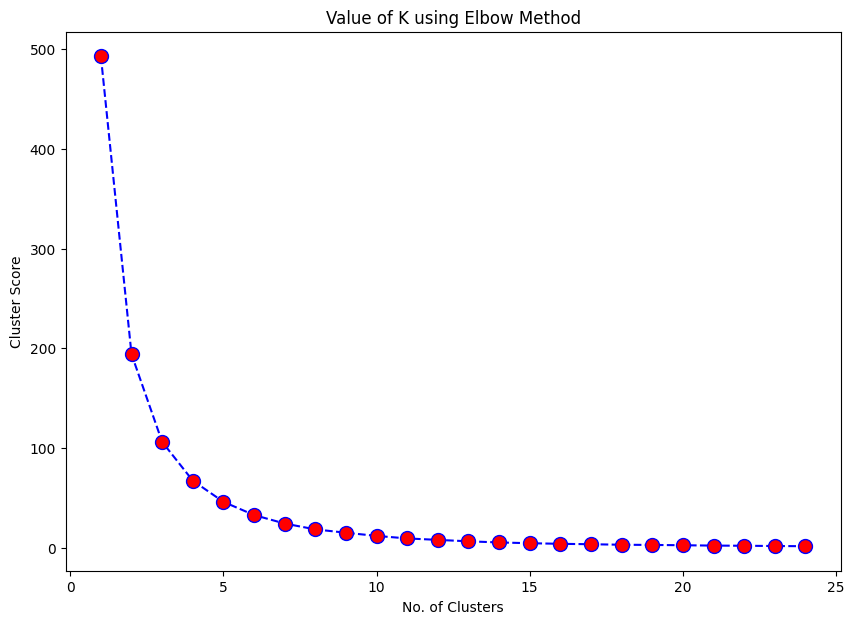

In [12]:
plt.figure(figsize=(10,7))
plt.plot(range(1,25),clusters,color='blue',linestyle='--',marker='o',markerfacecolor='red',markersize=10)
plt.title('Value of K using Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Cluster Score')
plt.plot()

In [13]:
#here the K is 5 as the gap between increases

In [14]:
kmeans=KMeans(n_clusters=4,random_state=10)

In [15]:
kmeans.fit(scaled_cols)

C:\Users\madha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=10)

In [16]:
pred=kmeans.predict(scaled_cols)

In [17]:
pred

array([1, 0, 1, 2, 3, 0, 3, 0, 0, 0, 2, 1, 0, 0, 0, 3, 2, 2, 2, 2, 0, 0,
       2, 2, 0, 0, 2, 3, 0, 1, 1, 2, 2, 0, 2, 0, 0, 2, 0, 3, 2, 2, 0, 1,
       0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 1, 0, 0, 1, 0, 3, 0, 1, 0, 2, 2, 2,
       2, 2, 2, 1, 0, 1, 0, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 0, 2, 0, 0, 2, 0, 1, 2, 1, 0, 2, 0, 2, 0, 3, 1, 2, 0,
       1, 2, 1, 0, 3, 2, 0, 1, 2, 0, 2, 0, 0, 3, 0, 2, 2, 1, 0, 0, 0, 1,
       1, 2, 1, 0, 1, 2, 1, 0, 2, 2, 0, 2, 2, 0, 2, 1, 3, 1, 0, 0, 2, 1,
       0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 3, 1, 2, 2, 0, 2, 1, 1, 2,
       2, 2, 0, 2, 1, 2, 0, 2, 2, 0, 2, 1, 2, 1, 1, 1, 2, 0, 2, 0, 1, 0,
       1, 0, 1, 0, 1, 2, 2, 0, 2, 1, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 3, 1, 1, 2, 2, 1, 2, 1,
       0, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2,
       0, 2, 2, 3, 1, 1, 1, 0, 2, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0, 1, 2, 2,
       2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 2, 3,

In [18]:
df['clusters']=pred

In [19]:
df.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates,clusters
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675,1
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594,0
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768,1
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036,2
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031,3


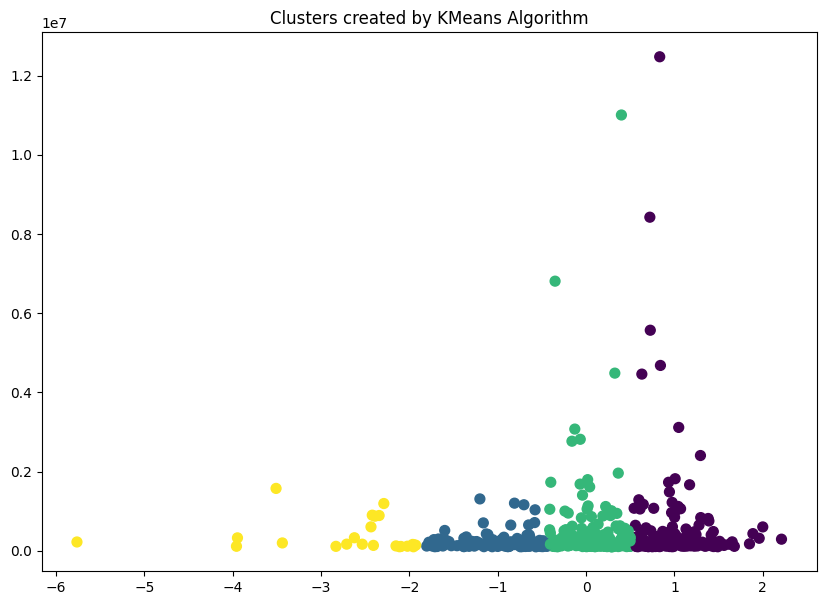

In [20]:
plt.figure(figsize=(10,7))
plt.scatter(scaled_cols,df['population_total'],c=df['clusters'],marker='o',s=50)
plt.title('Clusters created by KMeans Algorithm')
plt.show()